In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

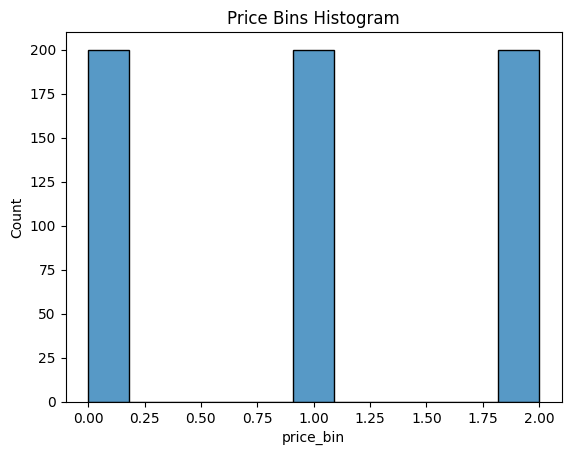

In [10]:
df = pd.read_csv('processed.csv', index_col=0)

df.drop(labels=['Price'], axis=1, inplace=True)

df = df.sample(frac=1, random_state=1)

over_sampling_strategy = {  
    1: 200,  
    2: 200   
}
under_sampling_strategy = { 
    0: 200
}

ros = RandomOverSampler(random_state=0,sampling_strategy=over_sampling_strategy)
rus = RandomUnderSampler(random_state=0,sampling_strategy=under_sampling_strategy)

pipeline = Pipeline([
    ('over',ros),
    ('under',rus)
])

X = df.drop(labels=['price_bin'], axis=1, inplace=False)
y = df['price_bin']

X_resampled, y_resampled = pipeline.fit_resample(X, y)

plt.title('Price Bins Histogram')
sns.histplot(y_resampled)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)